<a href="https://colab.research.google.com/github/Hideki-Iwaki-TUS/FinancialMath/blob/main/FinancialMath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: yahoo financeから2020年1月〜2020年12月までの月次終値，日経平均株価と米ドル円為替レートを取得してデータ・フレームにする．

import yfinance as yf
import pandas as pd

# 日経平均株価のティッカーシンボル
nikkei_ticker = "^N225"

# 米ドル円の為替レートのティッカーシンボル
usd_jpy_ticker = "USDJPY=X"

# データ取得期間
start_date = "2020-01-01"
end_date = "2020-12-31"

# データ取得
nikkei_data = yf.download(nikkei_ticker, start=start_date, end=end_date, interval="1mo")
usd_jpy_data = yf.download(usd_jpy_ticker, start=start_date, end=end_date, interval="1mo")

# 月末の終値のみを抽出
# Access 'Adj Close' using MultiIndex if it exists
try:
    nikkei_monthly = nikkei_data[('Adj Close', nikkei_ticker)].resample("ME").last()
    usd_jpy_monthly = usd_jpy_data[('Adj Close', usd_jpy_ticker)].resample("ME").last()
except KeyError:
    # Fallback to 'Close' if 'Adj Close' is not in MultiIndex
    nikkei_monthly = nikkei_data["Close"].resample("ME").last()
    usd_jpy_monthly = usd_jpy_data["Close"].resample("ME").last()

# データフレームの作成
# nikkei_monthly and usd_jpy_monthly's index is used as the DataFrame's index
# Convert nikkei_monthly and usd_jpy_monthly to Series by squeezing
df = pd.DataFrame({
    "Nikkei225": nikkei_monthly.squeeze(),  # Convert to Series
    "USDJPY": usd_jpy_monthly.squeeze()   # Convert to Series
}, index=nikkei_monthly.index) # Pass the index explicitly


# 結果の表示
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Nikkei225,USDJPY
Date,,
2020-01-31,23205.179688,108.876999
2020-02-29,21142.960938,108.136002
2020-03-31,18917.009766,108.035004
2020-04-30,20193.689453,106.610001
2020-05-31,21877.890625,107.760002
2020-06-30,22288.140625,107.589996
2020-07-31,21710.000000,104.682999
2020-08-31,23139.759766,105.535004
2020-09-30,23185.119141,105.664001


In [ ]:
# prompt: Excelファイルを読み込んでデータフレームにしてください．

import pandas as pd
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  df = pd.read_excel(fn)
df


Saving N225_USDJPY2020.xlsx to N225_USDJPY2020 (2).xlsx
User uploaded file "N225_USDJPY2020 (2).xlsx" with length 6191 bytes


,Date,USDJPY,Nikkei225
0,2020-01-01,108.876999,23205.179688
1,2020-02-01,108.136002,21142.960938
2,2020-03-01,108.035004,18917.009766
3,2020-04-01,106.610001,20193.689453
4,2020-05-01,107.760002,21877.890625
5,2020-06-01,107.589996,22288.140625
6,2020-07-01,104.682999,21710.000000
7,2020-08-01,105.535004,23139.759766
8,2020-09-01,105.664001,23185.119141
9,2020-10-01,104.554001,22977.130859


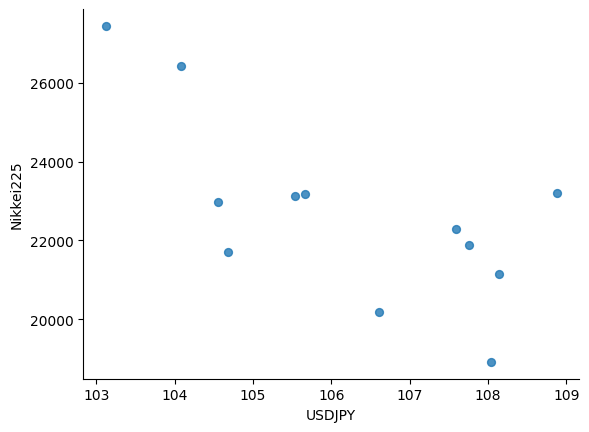

In [ ]:
# @title USDJPY vs Nikkei225

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='USDJPY', y='Nikkei225', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

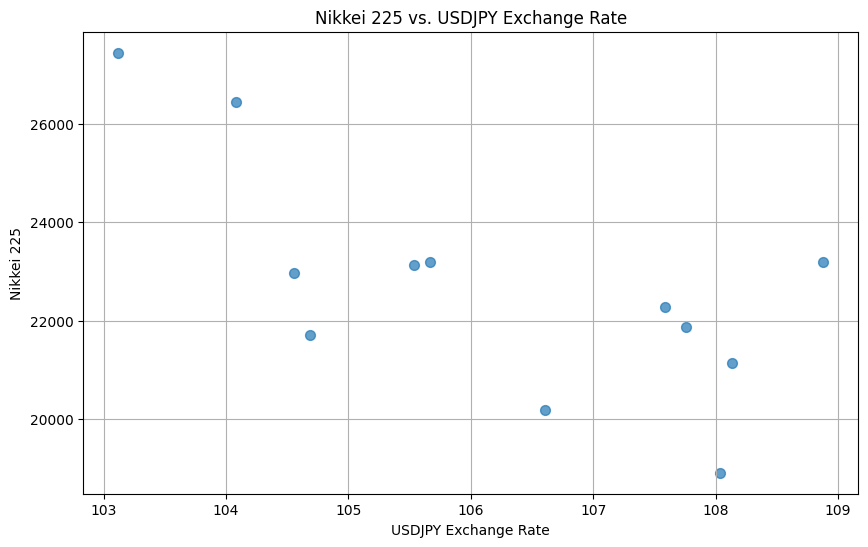

In [ ]:
# prompt: Nikkei225とUSDJPYの散布図を横軸を為替レートにして描く．

import matplotlib.pyplot as plt

# Assuming 'df' DataFrame from the previous code block is available

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(df["USDJPY"], df["Nikkei225"], s=50, alpha=0.7) # x-axis: USDJPY, y-axis: Nikkei225
plt.xlabel("USDJPY Exchange Rate")
plt.ylabel("Nikkei 225")
plt.title("Nikkei 225 vs. USDJPY Exchange Rate")
plt.grid(True)
plt.show()


In [ ]:
# prompt: Nikkei225とUSDJPYの共分散と相関係数を求める．

# 共分散と相関係数の計算
covariance = df["Nikkei225"].cov(df["USDJPY"])
correlation = df["Nikkei225"].corr(df["USDJPY"])

print(f"共分散: {covariance}")
print(f"相関係数: {correlation}")


共分散: -3046.4247375021255
相関係数: -0.685473328398975


In [ ]:
# prompt: 共分散の計算において，分母をデータ数として計算してください．

import numpy as np

# 共分散の計算（分母をデータ数で計算）
n = len(df)  # データ数
nikkei_mean = np.mean(df["Nikkei225"])
usd_jpy_mean = np.mean(df["USDJPY"])

covariance_n = np.sum((df["Nikkei225"] - nikkei_mean) * (df["USDJPY"] - usd_jpy_mean)) / n

print(f"共分散（分母をデータ数で計算）: {covariance_n}")


共分散（分母をデータ数で計算）: -2792.5560093769486


In [ ]:
# prompt: 2017年9月から2022年8月までの日経平均月次終値を取得してください．

import yfinance as yf
import pandas as pd

# 日経平均株価のティッカーシンボル
nikkei_ticker = "^N225"

# データ取得期間
start_date = "2017-09-01"
end_date = "2022-08-31"

# データ取得
nikkei_data = yf.download(nikkei_ticker, start=start_date, end=end_date, interval="1mo")

# 月末の終値のみを抽出
# Access 'Close' using MultiIndex if it exists
nikkei_monthly = nikkei_data[('Close', nikkei_ticker)].resample("M").last()


# データフレームの作成
df = pd.DataFrame({"Nikkei225": nikkei_monthly})

# 結果の表示
df

[*********************100%***********************]  1 of 1 completed
<ipython-input-45-9d5302f75b4f>:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  nikkei_monthly = nikkei_data[('Close', nikkei_ticker)].resample("M").last()


,Nikkei225
Date,
2017-09-30,20356.279297
2017-10-31,22011.609375
2017-11-30,22724.960938
2017-12-31,22764.939453
2018-01-31,23098.289062
2018-02-28,22068.240234
2018-03-31,21454.300781
2018-04-30,22467.869141
2018-05-31,22201.820312


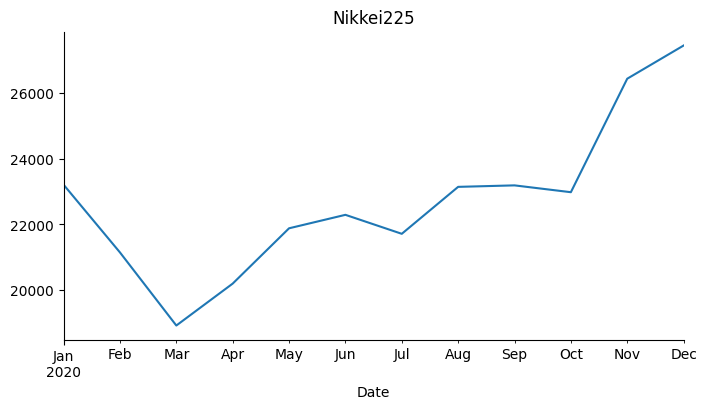

In [ ]:
# @title Nikkei225

from matplotlib import pyplot as plt
df['Nikkei225'].plot(kind='line', figsize=(8, 4), title='Nikkei225')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# グラフ内で日本語表記を可能にする．
!pip install japanize-matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib # This import should work after installation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 37.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=b57bbe6247a06b1e6d068b7bf9fec3927aec2f410ef40e82f1fe08637966590f
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


In [ ]:
# prompt: Nikkei225のラグ１〜ラグ１０までの自己相関係数を求める．

from statsmodels.tsa.stattools import acf

# 自己相関係数の計算 (ラグ1～10)
acf_values = acf(df["Nikkei225"], nlags=10)

# 結果の表示
print("Nikkei225の自己相関係数:")
for lag, acf_value in enumerate(acf_values[1:]):  #ラグ0を除外
    print(f"ラグ {lag+1}: {acf_value}")


Nikkei225の自己相関係数:
ラグ 1: 0.5818092074679493
ラグ 2: 0.15477495849397324
ラグ 3: 0.11598860584793735
ラグ 4: 0.012291690978131122
ラグ 5: -0.12885577830577763
ラグ 6: -0.1408324346389961
ラグ 7: -0.2393814681363856
ラグ 8: -0.4225483779448613
ラグ 9: -0.38127319293773493
ラグ 10: -0.08979134541725133


In [ ]:
# prompt: 自己相関係数を求める式を表示してください．

# 自己相関係数の計算式

# 時系列データ: x_1, x_2, ..., x_n
# ラグ: k (k < n)

# 自己共分散（ラグk）:
# γ_k = (1/(n-k)) * Σ_{i=1}^{n-k} (x_i - μ) * (x_{i+k} - μ)
# μ: 時系列データの平均値

# 自己相関係数（ラグk）:
# ρ_k = γ_k / γ_0
# γ_0: 自己共分散（ラグ0）

# γ_0 = (1/n) * Σ_{i=1}^{n} (x_i - μ)^2  分散に等しい


# Pythonでの計算例（上記コードの一部を抜粋・修正）
from statsmodels.tsa.stattools import acf

# 自己相関係数の計算 (ラグ1～10)
acf_values = acf(df["Nikkei225"], nlags=10)

# 結果の表示
print("Nikkei225の自己相関係数:")
for lag, acf_value in enumerate(acf_values[1:]):  #ラグ0を除外
    print(f"ラグ {lag+1}: {acf_value}")


Nikkei225の自己相関係数:
ラグ 1: 0.5818092074679493
ラグ 2: 0.15477495849397324
ラグ 3: 0.11598860584793735
ラグ 4: 0.012291690978131122
ラグ 5: -0.12885577830577763
ラグ 6: -0.1408324346389961
ラグ 7: -0.2393814681363856
ラグ 8: -0.4225483779448613
ラグ 9: -0.38127319293773493
ラグ 10: -0.08979134541725133


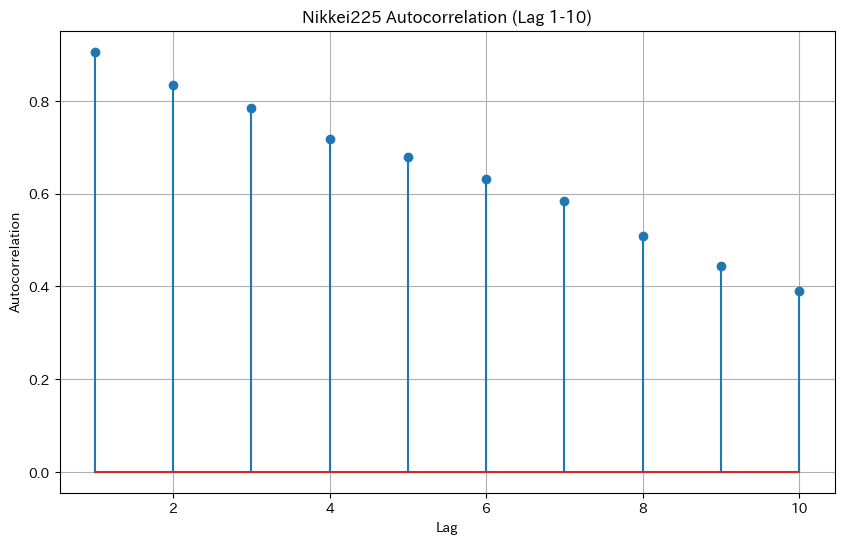

In [ ]:
# prompt: Nikkei225のラグ１〜ラグ１０までのコレグラムを描く．

import matplotlib.pyplot as plt

# 自己相関係数の計算 (ラグ1～10)
acf_values = acf(df["Nikkei225"], nlags=10)

# ラグを格納するリスト
lags = range(1, 11)

# コレログラムのプロット
plt.figure(figsize=(10, 6))
plt.stem(lags, acf_values[1:]) #ラグ0を除外してプロット
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Nikkei225 Autocorrelation (Lag 1-10)")
plt.grid(True)
plt.show()


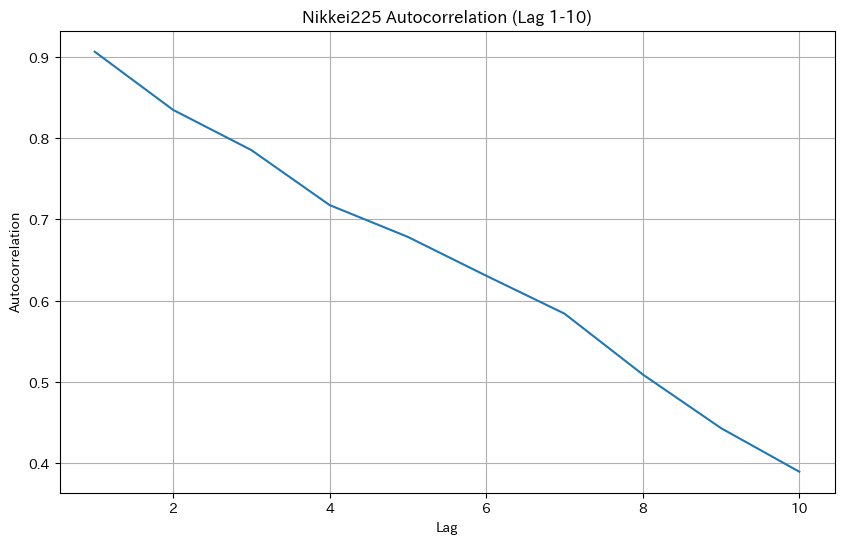

In [ ]:
# prompt: 上のNikkei225コレログラムを，各自己相関係数の値を結んだグラフにする．

# 自己相関係数の計算 (ラグ1～10)
acf_values = acf(df["Nikkei225"], nlags=10)

# ラグを格納するリスト
lags = range(1, 11)

# 自己相関係数の値を結んだグラフのプロット
plt.figure(figsize=(10, 6))
plt.plot(lags, acf_values[1:]) #ラグ0を除外してプロット
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Nikkei225 Autocorrelation (Lag 1-10)")
plt.grid(True)
plt.show()


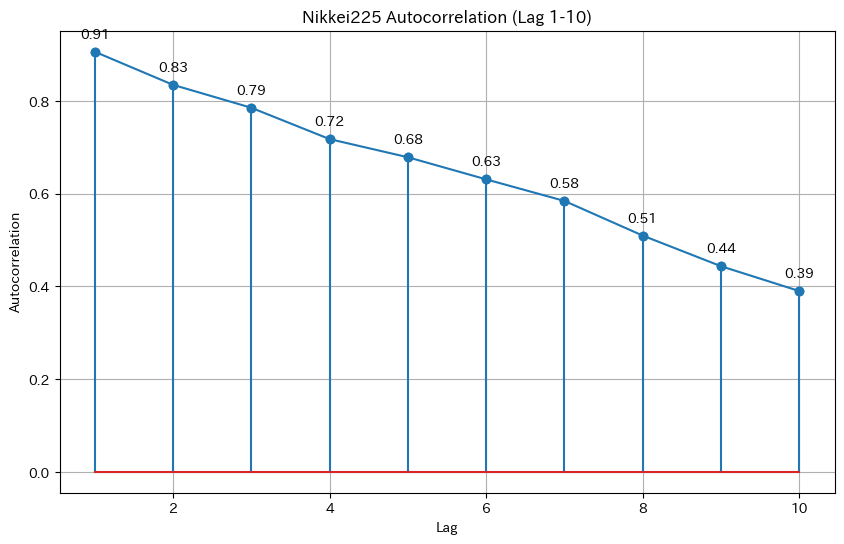

In [ ]:
# prompt: 上のNikkei225コレログラムで，各自己相関係数の値を点で強調する．加えて，書く自己相関係数の値を線で結ぶ．

# 自己相関係数の計算 (ラグ1～10)
acf_values = acf(df["Nikkei225"], nlags=10)

# ラグを格納するリスト
lags = range(1, 11)

# コレログラムのプロット
plt.figure(figsize=(10, 6))
plt.stem(lags, acf_values[1:])  # ラグ0を除外してプロット
plt.plot(lags, acf_values[1:], marker='o') # 自己相関係数の値を結んだ線を追加

# 各自己相関係数の値を点で強調
for lag, acf_value in enumerate(acf_values[1:]):
    plt.annotate(f"{acf_value:.2f}", (lag + 1, acf_value), textcoords="offset points", xytext=(0,10), ha='center')


plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Nikkei225 Autocorrelation (Lag 1-10)")
plt.grid(True)
plt.show()


In [ ]:
# prompt: yahoo financeから2020年1月〜2020年12月までの月次終値，日経平均株価と米ドル円為替レートを取得してデータ・フレームにする．

import yfinance as yf
import pandas as pd

# 日経平均株価のティッカーシンボル
nikkei_ticker = "^N225"

# 米ドル円の為替レートのティッカーシンボル
usd_jpy_ticker = "USDJPY=X"

# データ取得期間
start_date = "2020-01-01"
end_date = "2020-12-31"

# データ取得
nikkei_data = yf.download(nikkei_ticker, start=start_date, end=end_date, interval="1mo")
usd_jpy_data = yf.download(usd_jpy_ticker, start=start_date, end=end_date, interval="1mo")

# 月末の終値のみを抽出
# Access 'Adj Close' using MultiIndex if it exists
try:
    nikkei_monthly = nikkei_data[('Adj Close', nikkei_ticker)].resample("M").last()
    usd_jpy_monthly = usd_jpy_data[('Adj Close', usd_jpy_ticker)].resample("M").last()
except KeyError:
    # Fallback to 'Close' if 'Adj Close' is not in MultiIndex
    nikkei_monthly = nikkei_data["Close"].resample("M").last()
    usd_jpy_monthly = usd_jpy_data["Close"].resample("M").last()

# データフレームの作成
# nikkei_monthly and usd_jpy_monthly's index is used as the DataFrame's index
# Convert nikkei_monthly and usd_jpy_monthly to Series by squeezing
df = pd.DataFrame({
    "Nikkei225": nikkei_monthly.squeeze(),  # Convert to Series
    "USDJPY": usd_jpy_monthly.squeeze()   # Convert to Series
}, index=nikkei_monthly.index) # Pass the index explicitly


# 結果の表示
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-12-78c4f4f98b50>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  nikkei_monthly = nikkei_data["Close"].resample("M").last()
<ipython-input-12-78c4f4f98b50>:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  usd_jpy_monthly = usd_jpy_data["Close"].resample("M").last()


,Nikkei225,USDJPY
Date,,
2020-01-31,23205.179688,108.876999
2020-02-29,21142.960938,108.136002
2020-03-31,18917.009766,108.035004
2020-04-30,20193.689453,106.610001
2020-05-31,21877.890625,107.760002
2020-06-30,22288.140625,107.589996
2020-07-31,21710.000000,104.682999
2020-08-31,23139.759766,105.535004
2020-09-30,23185.119141,105.664001


In [ ]:
# prompt: Excelファイルを読み込んでデータフレームにしてください．

import pandas as pd

# Assuming 'uploaded' dictionary from the previous code block is available
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  # Check if the uploaded file is an Excel file
  if fn.endswith(('.xls', '.xlsx')):
    df = pd.read_excel(fn)
    print(df) # Display the DataFrame
  else:
    print(f"File '{fn}' is not an Excel file.")


User uploaded file "N225_USDJPY2020 (2).xlsx" with length 6191 bytes
         Date      USDJPY     Nikkei225
0  2020-01-01  108.876999  23205.179688
1  2020-02-01  108.136002  21142.960938
2  2020-03-01  108.035004  18917.009766
3  2020-04-01  106.610001  20193.689453
4  2020-05-01  107.760002  21877.890625
5  2020-06-01  107.589996  22288.140625
6  2020-07-01  104.682999  21710.000000
7  2020-08-01  105.535004  23139.759766
8  2020-09-01  105.664001  23185.119141
9  2020-10-01  104.554001  22977.130859
10 2020-11-01  104.082001  26433.619141
11 2020-12-01  103.121002  27444.169922


In [ ]:
# prompt: USDJPYをNikkei225に線形回帰したときの回帰係数と決定係数を求める．

import statsmodels.api as sm

# 線形回帰モデルの作成
X = df["USDJPY"]
y = df["Nikkei225"]
X = sm.add_constant(X)  # 定数項を追加
model = sm.OLS(y, X)
results = model.fit()

# 回帰係数と決定係数の表示
print(results.summary())

# 回帰係数
coefficient = results.params["USDJPY"]
print(f"回帰係数: {coefficient}")

# 決定係数
r_squared = results.rsquared
print(f"決定係数: {r_squared}")


                            OLS Regression Results                            
Dep. Variable:              Nikkei225   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     8.863
Date:                Sun, 18 May 2025   Prob (F-statistic):             0.0139
Time:                        23:25:29   Log-Likelihood:                -105.97
No. Observations:                  12   AIC:                             215.9
Df Residuals:                      10   BIC:                             216.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.151e+05    3.1e+04      3.708      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [ ]:
# prompt: b=(Nikkei225とUSDJPYと共分散）/（UDJPYの分散），
# a=(Nikkkei225平均)-b*(USDJPY平均)として，bとaの値を求めてください．

# Calculate b and a
b = df["Nikkei225"].cov(df["USDJPY"]) / df["USDJPY"].var()
a = df["Nikkei225"].mean() - b * df["USDJPY"].mean()

print(f"b: {b}")
print(f"a: {a}")


b: -870.0308371135549
a: 115124.73964627444


In [ ]:
# prompt: 当てはめ値=Nikkei225平均+b*(USDJPY-USDJPY平均),
# 決定係数=(当てはめ値の分散)/(Nikkei225の分散),
# を求めて，決定係数の値と（Nikkei225とUSDJPYの相関係数）の２乗の値を表示してください．

# Calculate fitted values
fitted_values = df["Nikkei225"].mean() + b * (df["USDJPY"] - df["USDJPY"].mean())

# Calculate the variance of fitted values
fitted_variance = np.var(fitted_values, ddof=1)  # Use ddof=1 for sample variance

# Calculate the variance of Nikkei225
nikkei_variance = np.var(df["Nikkei225"], ddof=1)

# Calculate the coefficient of determination
determination_coefficient = fitted_variance / nikkei_variance

# Calculate the square of the correlation coefficient
correlation_squared = df["Nikkei225"].corr(df["USDJPY"])**2

# Print the results
print(f"決定係数: {determination_coefficient}")
print(f"（Nikkei225とUSDJPYの相関係数）の２乗の値: {correlation_squared}")


決定係数: 0.4698736128805892
（Nikkei225とUSDJPYの相関係数）の２乗の値: 0.4698736128805893


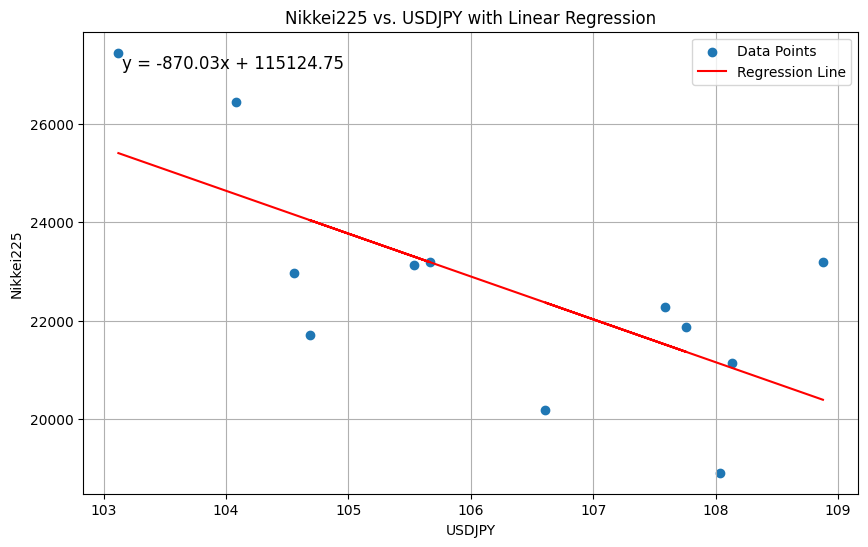

In [ ]:
# prompt: Nikkei225とUSDJPYの散布図に線形回帰式を加えたグラフを描く．

import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming 'df' DataFrame from the previous code block is available

# 線形回帰モデルの作成
X = df["USDJPY"]
y = df["Nikkei225"]
X = sm.add_constant(X)  # 定数項を追加
model = sm.OLS(y, X)
results = model.fit()

# 散布図の作成
plt.figure(figsize=(10, 6))
plt.scatter(df["USDJPY"], df["Nikkei225"], label="Data Points")

# 回帰直線の描画
plt.plot(df["USDJPY"], results.fittedvalues, color="red", label="Regression Line")

# グラフの装飾
plt.xlabel("USDJPY")
plt.ylabel("Nikkei225")
plt.title("Nikkei225 vs. USDJPY with Linear Regression")
plt.legend()
plt.grid(True)

# 回帰式を表示
plt.text(0.05, 0.95, f"y = {results.params['USDJPY']:.2f}x + {results.params['const']:.2f}",
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')


plt.show()


# 4.4 正規分布

In [ ]:
# prompt: 正規分布に確率密度関数を教えてください．

# 正規分布の確率密度関数 (Probability Density Function - PDF)

# 正規分布の確率密度関数 f(x) は以下の式で表されます。
# f(x | μ, σ^2) = (1 / sqrt(2 * π * σ^2)) * exp(-(x - μ)^2 / (2 * σ^2))

# ここで、
# x: 確率変数
# μ (ミュー): 平均 (Mean)
# σ (シグマ): 標準偏差 (Standard Deviation)
# σ^2 (シグマ二乗): 分散 (Variance)
# π (パイ): 円周率 (約 3.14159)
# exp: 自然対数の底 e を底とする指数関数

# 確率密度関数は、特定の点における確率ではなく、その点の「確率の密度」を示します。
# ある区間 [a, b] の確率を計算するには、この確率密度関数をその区間で積分します。

# Pythonで正規分布のPDFを計算するためのライブラリとして scipy.stats がよく用いられます。
from scipy.stats import norm

# 例: 平均0、標準偏差1の標準正規分布のPDF
mu = 0
sigma = 1

# x = 0 における確率密度
x_value = 0
pdf_at_0 = norm.pdf(x_value, loc=mu, scale=sigma)
print(f"標準正規分布の x={x_value} における確率密度: {pdf_at_0}")

# x = 1 における確率密度
x_value = 1
pdf_at_1 = norm.pdf(x_value, loc=mu, scale=sigma)
print(f"標準正規分布の x={x_value} における確率密度: {pdf_at_1}")

# 平均が5、標準偏差が2の正規分布のPDF
mu_custom = 5
sigma_custom = 2

# x = 5 における確率密度
x_value_custom = 5
pdf_custom_at_5 = norm.pdf(x_value_custom, loc=mu_custom, scale=sigma_custom)
print(f"平均{mu_custom}, 標準偏差{sigma_custom}の正規分布の x={x_value_custom} における確率密度: {pdf_custom_at_5}")

# PDFのグラフを描画することもできます。
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
pdf_values = norm.pdf(x, loc=mu, scale=sigma)

plt.figure(figsize=(8, 5))
plt.plot(x, pdf_values, label=f'Normal Distribution (μ={mu}, σ={sigma})')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Probability Density Function of Normal Distribution')
plt.grid(True)
plt.legend()
plt.show()



標準正規分布の x=0 における確率密度: 0.3989422804014327
標準正規分布の x=1 における確率密度: 0.24197072451914337
平均5, 標準偏差2の正規分布の x=5 における確率密度: 0.19947114020071635


NameError: name 'np' is not defined

標準正規分布の x=0 における確率密度: 0.3989422804014327
標準正規分布の x=1 における確率密度: 0.24197072451914337
平均5, 標準偏差2の正規分布の x=5 における確率密度: 0.19947114020071635


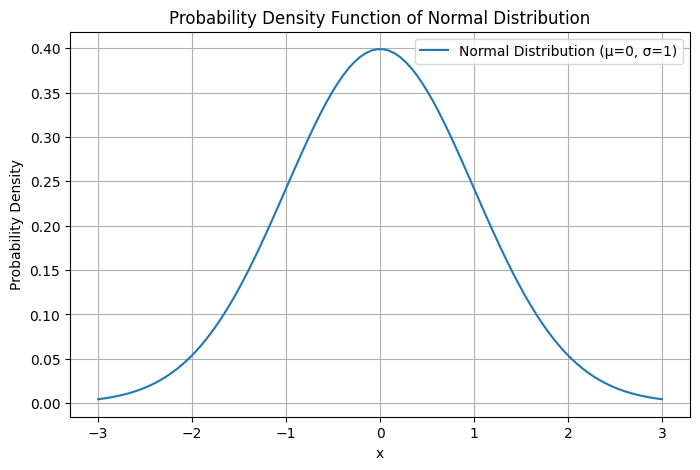

In [ ]:
# prompt: 正規分布に確率密度関数を教えてください．

# 正規分布の確率密度関数 (Probability Density Function - PDF)

# 正規分布の確率密度関数 f(x) は以下の式で表されます。
# f(x | μ, σ^2) = (1 / sqrt(2 * π * σ^2)) * exp(-(x - μ)^2 / (2 * σ^2))

# ここで、
# x: 確率変数
# μ (ミュー): 平均 (Mean)
# σ (シグマ): 標準偏差 (Standard Deviation)
# σ^2 (シグマ二乗): 分散 (Variance)
# π (パイ): 円周率 (約 3.14159)
# exp: 自然対数の底 e を底とする指数関数

# 確率密度関数は、特定の点における確率ではなく、その点の「確率の密度」を示します。
# ある区間 [a, b] の確率を計算するには、この確率密度関数をその区間で積分します。

# Pythonで正規分布のPDFを計算するためのライブラリとして scipy.stats がよく用いられます。
from scipy.stats import norm
import numpy as np # numpyをインポートします
import matplotlib.pyplot as plt # matplotlibもインポートします

# 例: 平均0、標準偏差1の標準正規分布のPDF
mu = 0
sigma = 1

# x = 0 における確率密度
x_value = 0
pdf_at_0 = norm.pdf(x_value, loc=mu, scale=sigma)
print(f"標準正規分布の x={x_value} における確率密度: {pdf_at_0}")

# x = 1 における確率密度
x_value = 1
pdf_at_1 = norm.pdf(x_value, loc=mu, scale=sigma)
print(f"標準正規分布の x={x_value} における確率密度: {pdf_at_1}")

# 平均が5、標準偏差が2の正規分布のPDF
mu_custom = 5
sigma_custom = 2

# x = 5 における確率密度
x_value_custom = 5
pdf_custom_at_5 = norm.pdf(x_value_custom, loc=mu_custom, scale=sigma_custom)
print(f"平均{mu_custom}, 標準偏差{sigma_custom}の正規分布の x={x_value_custom} における確率密度: {pdf_custom_at_5}")

# PDFのグラフを描画することもできます。
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
pdf_values = norm.pdf(x, loc=mu, scale=sigma)

plt.figure(figsize=(8, 5))
plt.plot(x, pdf_values, label=f'Normal Distribution (μ={mu}, σ={sigma})')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Probability Density Function of Normal Distribution')
plt.grid(True)
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30906 (\N{CJK UNIFIED IDEOGRAPH-78BA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  fig.canvas

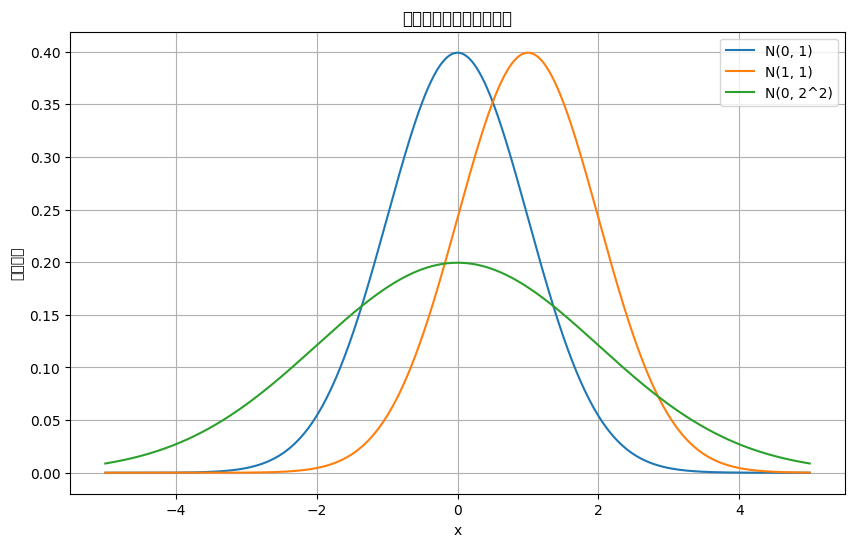

In [ ]:
# prompt: 平均=μ,分散=σ^2の正規分布をN(μ，σ^2)としたとき，N(0,1), N(1,1), N(0,2^2)の確率密度関数のグラフを描いてください．

# 描画範囲の設定
x = np.linspace(-5, 5, 1000)

# 各正規分布のPDFを計算
pdf_n01 = norm.pdf(x, loc=0, scale=1)
pdf_n11 = norm.pdf(x, loc=1, scale=1)
pdf_n04 = norm.pdf(x, loc=0, scale=2) # 分散2^2 = 4 なので標準偏差は2

# グラフの描画
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_n01, label='N(0, 1)')
plt.plot(x, pdf_n11, label='N(1, 1)')
plt.plot(x, pdf_n04, label='N(0, 2^2)')

# グラフの装飾
plt.xlabel('x')
plt.ylabel('確率密度')
plt.title('正規分布の確率密度関数')
plt.legend()
plt.grid(True)
plt.show()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 54.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=c89e2738c413b71c16a46c5ad607ed2369be63f2b1b4af11903baef4f64aadbe
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


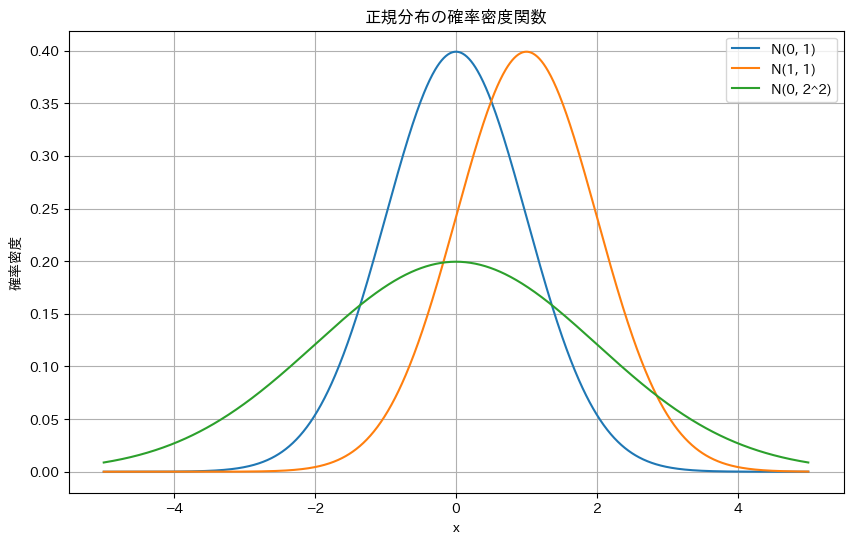

In [ ]:
# prompt: グラフ内の日本語が文字化けしています．正しく表示できるようにしてください．

# グラフ内で日本語表記を可能にする．
!pip install japanize-matplotlib

import matplotlib.pyplot as plt
import japanize_matplotlib # This import should work after installation

# Previous code...

# 描画範囲の設定
x = np.linspace(-5, 5, 1000)

# 各正規分布のPDFを計算
pdf_n01 = norm.pdf(x, loc=0, scale=1)
pdf_n11 = norm.pdf(x, loc=1, scale=1)
pdf_n04 = norm.pdf(x, loc=0, scale=2) # 分散2^2 = 4 なので標準偏差は2

# グラフの描画
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_n01, label='N(0, 1)')
plt.plot(x, pdf_n11, label='N(1, 1)')
plt.plot(x, pdf_n04, label='N(0, 2^2)')

# グラフの装飾
plt.xlabel('x')
plt.ylabel('確率密度')
plt.title('正規分布の確率密度関数')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# prompt: Xを標準正規分布に従う確率変数としたとき，Pr(-1<X<1), Pr(-2<X<2), Pr(-3<X<3)を求めて下さい．

# Pr(-1<X<1)
prob_minus1_to_1 = norm.cdf(1) - norm.cdf(-1)
print(f"Pr(-1 < X < 1): {prob_minus1_to_1:.4f}")

# Pr(-2<X<2)
prob_minus2_to_2 = norm.cdf(2) - norm.cdf(-2)
print(f"Pr(-2 < X < 2): {prob_minus2_to_2:.4f}")

# Pr(-3<X<3)
prob_minus3_to_3 = norm.cdf(3) - norm.cdf(-3)
print(f"Pr(-3 < X < 3): {prob_minus3_to_3:.4f}")


Pr(-1 < X < 1): 0.6827
Pr(-2 < X < 2): 0.9545
Pr(-3 < X < 3): 0.9973


In [1]:
# prompt: ２変量の[0,1]一様確率密度関数のグラフを作成して下さい．

# [0,1]一様確率密度関数のグラフを作成
# xとyの範囲を設定
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

# グリッドを作成
X, Y = np.meshgrid(x, y)

# [0,1]区間内では確率密度が1、それ以外では0
# この場合、XとYが両方とも[0,1]区間内にある領域を表現します
Z = np.ones_like(X) # [0,1]x[0,1]の範囲では確率密度が1

# 3Dグラフの作成
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# サーフェスプロット
ax.plot_surface(X, Y, Z, cmap='viridis')

# ラベルとタイトルの設定
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('確率密度')
ax.set_title('[0,1] 一様確率密度関数')

# Z軸の範囲を設定 (0より少し下から1より少し上まで)
ax.set_zlim(0, 1.5)

plt.show()

NameError: name 'np' is not defined

In [21]:
# prompt: ２変量の[0,1]一様確率密度関数のグラフを作成して下さい．

import numpy as np # numpyをインポートします
import matplotlib.pyplot as plt # matplotlibをインポートします

# [0,1]一様確率密度関数のグラフを作成
# xとyの範囲を設定
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

# グリッドを作成
X, Y = np.meshgrid(x, y)

# [0,1]区間内では確率密度が1、それ以外では0
# この場合、XとYが両方とも[0,1]区間内にある領域を表現します
Z = np.ones_like(X) # [0,1]x[0,1]の範囲では確率密度が1

# 3Dグラフの作成
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# サーフェスプロット
ax.plot_surface(X, Y, Z, cmap='viridis')

# ラベルとタイトルの設定
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('確率密度')
ax.set_title('[0,1] 一様確率密度関数')

# Z軸の範囲を設定 (0より少し下から1より少し上まで)
ax.set_zlim(0, 1.5)

plt.show()

<IPython.core.display.Javascript object>

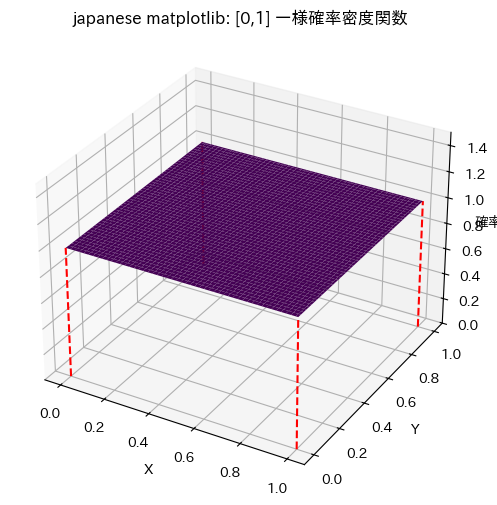

In [13]:
# prompt: 上の図に(x,y)座標点(0,0), (0,1), (1,0),(1,1)に垂直線を加えて下さい．また，図のタイトルにjapanese matplotlibを導入して日本語表示できるようにして下さい．

# Previous code...

# [0,1]一様確率密度関数のグラフを作成
# xとyの範囲を設定
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

# グリッドを作成
X, Y = np.meshgrid(x, y)

# [0,1]区間内では確率密度が1、それ以外では0
# この場合、XとYが両方とも[0,1]区間内にある領域を表現します
Z = np.ones_like(X) # [0,1]x[0,1]の範囲では確率密度が1

# 3Dグラフの作成
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# サーフェスプロット
ax.plot_surface(X, Y, Z, cmap='viridis')

# ラベルとタイトルの設定
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('確率密度')
ax.set_title('japanese matplotlib: [0,1] 一様確率密度関数')

# Z軸の範囲を設定 (0より少し下から1より少し上まで)
ax.set_zlim(0, 1.5)

# (0,0), (0,1), (1,0), (1,1)に垂直線を追加
ax.plot([0, 0], [0, 0], [0, 1], color='red', linestyle='--') # (0,0)
ax.plot([0, 0], [1, 1], [0, 1], color='red', linestyle='--') # (0,1)
ax.plot([1, 1], [0, 0], [0, 1], color='red', linestyle='--') # (1,0)
ax.plot([1, 1], [1, 1], [0, 1], color='red', linestyle='--') # (1,1)


plt.show()


In [20]:
# prompt: (x,y)二変量正規分布の同時確率密度関数のグラフを作成して下さい．

from scipy.stats import multivariate_normal

# 2変量正規分布のパラメータを設定
mean = [0, 0]  # 平均ベクトル
cov = [[1, 0.5], [0.5, 1]]  # 共分散行列

# xとyの範囲を設定
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

# グリッドを作成
X, Y = np.meshgrid(x, y)

# グリッドポイントに対応する座標の配列を作成
pos = np.dstack((X, Y))

# 2変量正規分布の確率密度関数を計算
rv = multivariate_normal(mean, cov)
Z = rv.pdf(pos)

# 3Dグラフの作成
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# サーフェスプロット
ax.plot_surface(X, Y, Z, cmap='viridis')

# ラベルとタイトルの設定
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('確率密度')
ax.set_title('2変量正規分布の同時確率密度関数')

plt.show()


<IPython.core.display.Javascript object>